In [1]:
import rasterio
import matplotlib 
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib import gridspec
from numpy import newaxis
import matplotlib.image as mpimg

matplotlib.rc('text', usetex = False)

In [2]:
class classes:
    classes_MCD12Q1v6LCType1 = [ 'NoData','Evergreen needleleaf forest', 'Evergreen broadleaf forest',
                                 'Deciduous needleleaf forest', 'Deciduous broadleaf forest',
                                 'Mixed forest', 'Closed shrublands', 'Open shrublands',
                                 'Woody savannas', 'Savannas', 'Grasslands', 'Permanent wetlands',
                                 'Croplands', 'Urban and built-up', 'Cropland natural vegetation mosaic',
                                 'Snow and ice', 'Barren or sparsely vegetated', 'Water' ]

    colors_MCD12Q1v6LCType1 = [ '#ababab', '#05450a', '#086a10', '#54a708',
                                '#78d203', '#009900', '#c6b044',
                                '#dcd159', '#dade48', '#fbff13',
                                '#b6ff05', '#27ff87', '#f096ff',
                                '#fa0000', '#ff6d4c', '#69fff8',
                                '#f9ffa4', '#1c0dff' ]

    classes_MCD12Q1v6LCProp1 = [ 'NoData','Barren',
                                 'Permanent Snow and Ice',
                                 'Water Bodies',
                                 'Evergreen Needleleaf Forests',
                                 'Evergreen Broadleaf Forests',
                                 'Deciduous Needleleaf Forests',
                                 'Deciduous Broadleaf Forests',
                                 'Mixed Broadleaf-Needleleaf Forests',
                                 'Mixed Broadleaf Evergreen-Deciduous Forests',
                                 'Open Forests',
                                 'Sparse Forests',
                                 'Dense Herbaceous',
                                 'Shrubs',
                                 'Sparse Herbaceous',
                                 'Dense Shrublands',
                                 'Shrubland-Grassland Mosaics',
                                 'Sparse Shrublands' ]

    colors_MCD12Q1v6LCProp1 = [ '#ababab', '#f9ffa4', '#69fff8', '#1c0dff',
                                '#05450a', '#086a10', '#54a708',
                                '#78d203', '#005a00', '#009900',
                                # '#006c00','#00d000','#b6ff05', #old
                                '#52b352', '#00d000', '#b6ff05',
                                '#98d604', '#dcd159', '#f1fb58',
                                '#fbee65' ]

    classes_MCD12Q1v6LCProp2 = ['NoData',
        'Barren',
        'Permanent Snow and Ice',
        'Water Bodies',
        'Urban and Built-up Lands',
        'Dense Forests',
        'Open Forests',
        'Forest/Cropland Mosaics',
        'Natural Herbaceous',
        'Natural Herbaceous-Croplands Mosaics',
        'Herbaceous Croplands',
        'Shrublands' ]

    short_MCD12Q1v6LCProp2 = ['NoData','Ba', 'SI',
                                 'W', 'Bu',
                                 'DF', 'OF', 'FCM',
                                 'NH', 'NHCM', 'HC',
                                 'S']
        
    colors_MCD12Q1v6LCProp2 = [ '#ababab', '#f9ffa4', '#69fff8', '#1c0dff',
                                '#fa0000', '#003f00', '#006c00',
                                '#e3ff77', '#b6ff05', '#93ce04',
                                '#f096ff', '#dcd159' ]

    classes_esa = [ 'NoData','Cropland rainfed',
                    'Cropland rainfed Herbaceous cover',
                    'Cropland rainfed Tree or shrub cover',
                    'Cropland irrigated or post-flooding',
                    'Mosaic cropland gt 50 natural vegetation (tree/shrub/herbaceous cover) lt 50',
                    'Mosaic natural vegetation gt 50 cropland lt 50',
                    'Tree cover broadleaved evergreen closed to open gt 15',
                    'Tree cover  broadleaved  deciduous  closed to open gt 15',
                    'Tree cover  broadleaved  deciduous  closed gt 40',
                    'Tree cover  broadleaved  deciduous  open 15 to 40',
                    'Tree cover  needleleaved  evergreen  closed to open gt 15',
                    'Tree cover  needleleaved  evergreen  closed gt 40',
                    'Tree cover  needleleaved  evergreen  open 15 to 40',
                    'Tree cover  needleleaved  deciduous  closed to open gt 15',
                    'Tree cover  needleleaved  deciduous  closed gt 40',
                    'Tree cover  needleleaved  deciduous  open 15 to 40',
                    'Tree cover  mixed leaf type',
                    'Mosaic tree and shrub gt 50 herbaceous cover lt 50',
                    'Mosaic herbaceous cover gt 50 / tree and shrub lt 50',
                    'Shrubland',
                    'Shrubland evergreen',
                    'Shrubland deciduous',
                    'Grassland',
                    'Lichens and mosses',
                    'Sparse vegetation (tree/shrub/herbaceous cover) lt 15',
                    'Sparse tree lt 15',
                    'Sparse shrub lt 15',
                    'Sparse herbaceous cover lt 15',
                    'Tree cover flooded fresh or brakish water',
                    'Tree cover flooded saline water',
                    'Shrub or herbaceous cover flooded water',
                    'Urban areas',
                    'Bare areas',
                    'Consolidated bare areas',
                    'Unconsolidated bare areas',
                    'Water bodies',
                    'Permanent snow and ice' ]

    colors_esa = [ '#ababab', '#ffff64', '#ffff64', '#ffff00',
                   '#aaf0f0', '#dcf064', '#c8c864',
                   '#006400', '#00a000', '#00a000',
                   '#aac800', '#003c00', '#003c00',
                   '#005000', '#285000', '#285000',
                   '#286400', '#788200', '#8ca000',
                   '#be9600', '#966400', '#966400',
                   '#be9600', '#ffb432', '#ffdcd2',
                   '#ffebaf', '#ffc864', '#ffd278',
                   '#ffebaf', '#00785a', '#009678',
                   '#00dc82', '#c31400', '#fff5d7',
                   '#dcdcdc', '#fff5d7', '#0046c8',
                   '#ffffff' ]

    classes_copernicus = [ 'NoData','Closed forest evergreen needleleaf',
                           'Closed forest deciduous needleleaf',
                           'Closed forest evergreen broadleaf',
                           'Closed forest deciduous broadleaf',
                           'Closed forest mixed',
                           'Closed forest unknown',
                           'Open forest evergreen needleleaf',
                           'Open forest deciduous needleleaf',
                           'Open forest evergreen broadleaf',
                           'Open forest deciduous broadleaf',
                           'Open forest mixed',
                           'Open forest unknown',
                           'Shrubs',
                           'Herbaceous vegetation',
                           'Herbaceous wetland',
                           'Moss and lichen',
                           'Bare - sparse vegetation',
                           'Cultivated and managed vegetation-agriculture cropland',
                           'Urban - built up',
                           'Snow and Ice',
                           'Permanent water bodies',
                           'Open sea' ]

    colors_copernicus = [ '#ababab', '#58481f',
                          '#70663e',
                          '#009900',
                          '#00cc00',
                          '#4e751f',
                          '#007800',
                          '#666000',
                          '#8d7400',
                          '#8db400',
                          '#a0dc00',
                          '#929900',
                          '#648c00',
                          '#ffbb22',
                          '#ffff4c',
                          '#0096a0',
                          '#fae6a0',
                          '#b4b4b4',
                          '#f096ff',
                          '#fa0000',
                          '#f0f0f0',
                          '#0032c8',
                          '#000080' ]

    classes_copernicus_cf2others = [ 'NoData','Closed forest',
                                     'Open forest',
                                     'Shrubs',
                                     'Herbaceous vegetation',
                                     'Bare / sparse vegetation',
                                     'Urban / built up',
                                     'Cultivated and managed vegetation/agriculture (cropland)',
                                     'Water bodies',
                                     'Herbaceous wetland' ]

    short_copernicus_cf2others = ['NoData','DF', 'OF',
                                 'S', 'HV',
                                 'Ba', 'Bu', 'C',
                                 'W', 'HW']
        
    colors_copernicus_cf2others = ['#ababab', '#003f00',
                                    '#006c00',
                                    '#ffbb22',
                                    '#b6ff05',
                                    '#f9ffa4',
                                    '#fa0000',
                                    '#f096ff',
                                    '#0032c8',
                                    '#0096a0']

    classes_merge_datasets2own = ['NoData',
                        'Barren',
                        'Water Bodies',
                        'Urban and Built-up Lands',
                        'Dense Forests',
                        'Open Forests',
                        'Natural Herbaceous',
                        'Croplands',
                        'Shrublands']
    
    short_merge_datasets2own = ['NoData','Ba', 
                                 'W', 'Bu',
                                 'DF', 'OF', 
                                 'NH', 'C',
                                 'S']

    colors_merge_datasets2own = ['#ababab','#f9ffa4','#1c0dff',
                               '#fa0000','#003f00',
                               '#006c00','#b6ff05',
                               '#f096ff','#dcd159']

    classes_mapbiomas = ['NoData','Forest Formation', 'Savanna Formation',
                                 'Mangrove', 'Flooded forest',
                                 'Wetland', 'Grassland', 'Other non forest natural formation',
                                 'Farming', 'Non vegetated area', 'Salt flat', 'River, Lake and Ocean',
                                 'Glacier']

    colors_mapbiomas = [ '#ababab','#009820','#00FE2D','#68743A','#74A5AF','#3CC2A6','#B9AE53','#F3C13C','#FFFEB5','#EC9999','#FD7127','#001DFC','#FFFFFF']


In [3]:
dataset_config = {
        'MCD12Q1v6raw_LCType1': {
            'classes': classes.classes_MCD12Q1v6LCType1,
            'colors': classes.colors_MCD12Q1v6LCType1},
        'MCD12Q1v6raw_LCProp1': {
            'classes': classes.classes_MCD12Q1v6LCProp1,
            'colors': classes.colors_MCD12Q1v6LCProp1},
        'MCD12Q1v6raw_LCProp2': {
            'classes': classes.classes_MCD12Q1v6LCProp2,
            'shortname': classes.short_MCD12Q1v6LCProp2,
            'colors': classes.colors_MCD12Q1v6LCProp2},
        'ESAraw': {
            'classes': classes.classes_esa,
            'colors': classes.colors_esa},
        'Copernicusraw': {
            'classes': classes.classes_copernicus,
            'colors': classes.colors_copernicus},
        'Copernicusnew_cf2others': {
            'name': 'C9*',
            'classes': classes.classes_copernicus_cf2others,
            'shortname': classes.short_copernicus_cf2others,
            'colors': classes.colors_copernicus_cf2others},
        'merge_datasets2own': {
            'name': 'O8*',
            'classes': classes.classes_merge_datasets2own,
            'shortname': classes.short_merge_datasets2own,            
            'colors': classes.colors_merge_datasets2own},
        'MCD12Q1v6stable_LCType1': {
            'classes': classes.classes_MCD12Q1v6LCType1,
            'colors': classes.colors_MCD12Q1v6LCType1},
        'MCD12Q1v6stable_LCProp2': {
            'name': 'M11*',
            'classes': classes.classes_MCD12Q1v6LCProp2,
            'shortname': classes.short_MCD12Q1v6LCProp2,
            'colors': classes.colors_MCD12Q1v6LCProp2},    
    }

In [4]:
def read_file(file):
    with rasterio.open(file) as src:
        return (src.read(1))

In [5]:
def plot_year(post_files, colormap, vmin, vmax, title):
    gridspec_kwargs = dict(top=0.9, bottom=0.1, left=0.1, right=0.9, wspace=0.05, hspace=0.2)

    fig, axes = plt.subplots(nrows=7, ncols=1, sharex=False, sharey=False, figsize=(20, 10), gridspec_kw=gridspec_kwargs)

    axs = axes.flatten()

    for i, data in enumerate(post_files):
#         axs[i].set_title(str(i+yS), fontsize='xx-large')
        axs[i].imshow(data, cmap=colormap, interpolation='none', vmin=vmin, vmax=vmax) 
        axs[i].axis('off')
        
    fig.text(0.45, 0.5, title, fontsize='xx-large', weight='bold', ha='center', va='center', rotation='vertical')

    plt.tight_layout()   

In [6]:
train = '15'
ckp = '42497'
tiles = ['tile_0_201', 'tile_0_143', 'tile_1_463',  'tile_0_365', 'tile_1_438', 'tile_1_713', 'tile_0_630']
tiles_modis = ['h10v08','h11v08','h10v09','h12v09','h13v09','h11v10','h12v10']
epoch = '30'
# datasets = ['mapbiomas','Copernicusnew_cf2others', 'Copernicusraw', 'merge_datasets2own', 'MCD12Q1v6raw_LCType1', 'MCD12Q1v6raw_LCProp1', 'MCD12Q1v6raw_LCProp2', 'ESAraw']
datasets = ['merge_datasets2own','MCD12Q1v6stable_LCProp2','Copernicusnew_cf2others']
tyear = 2015

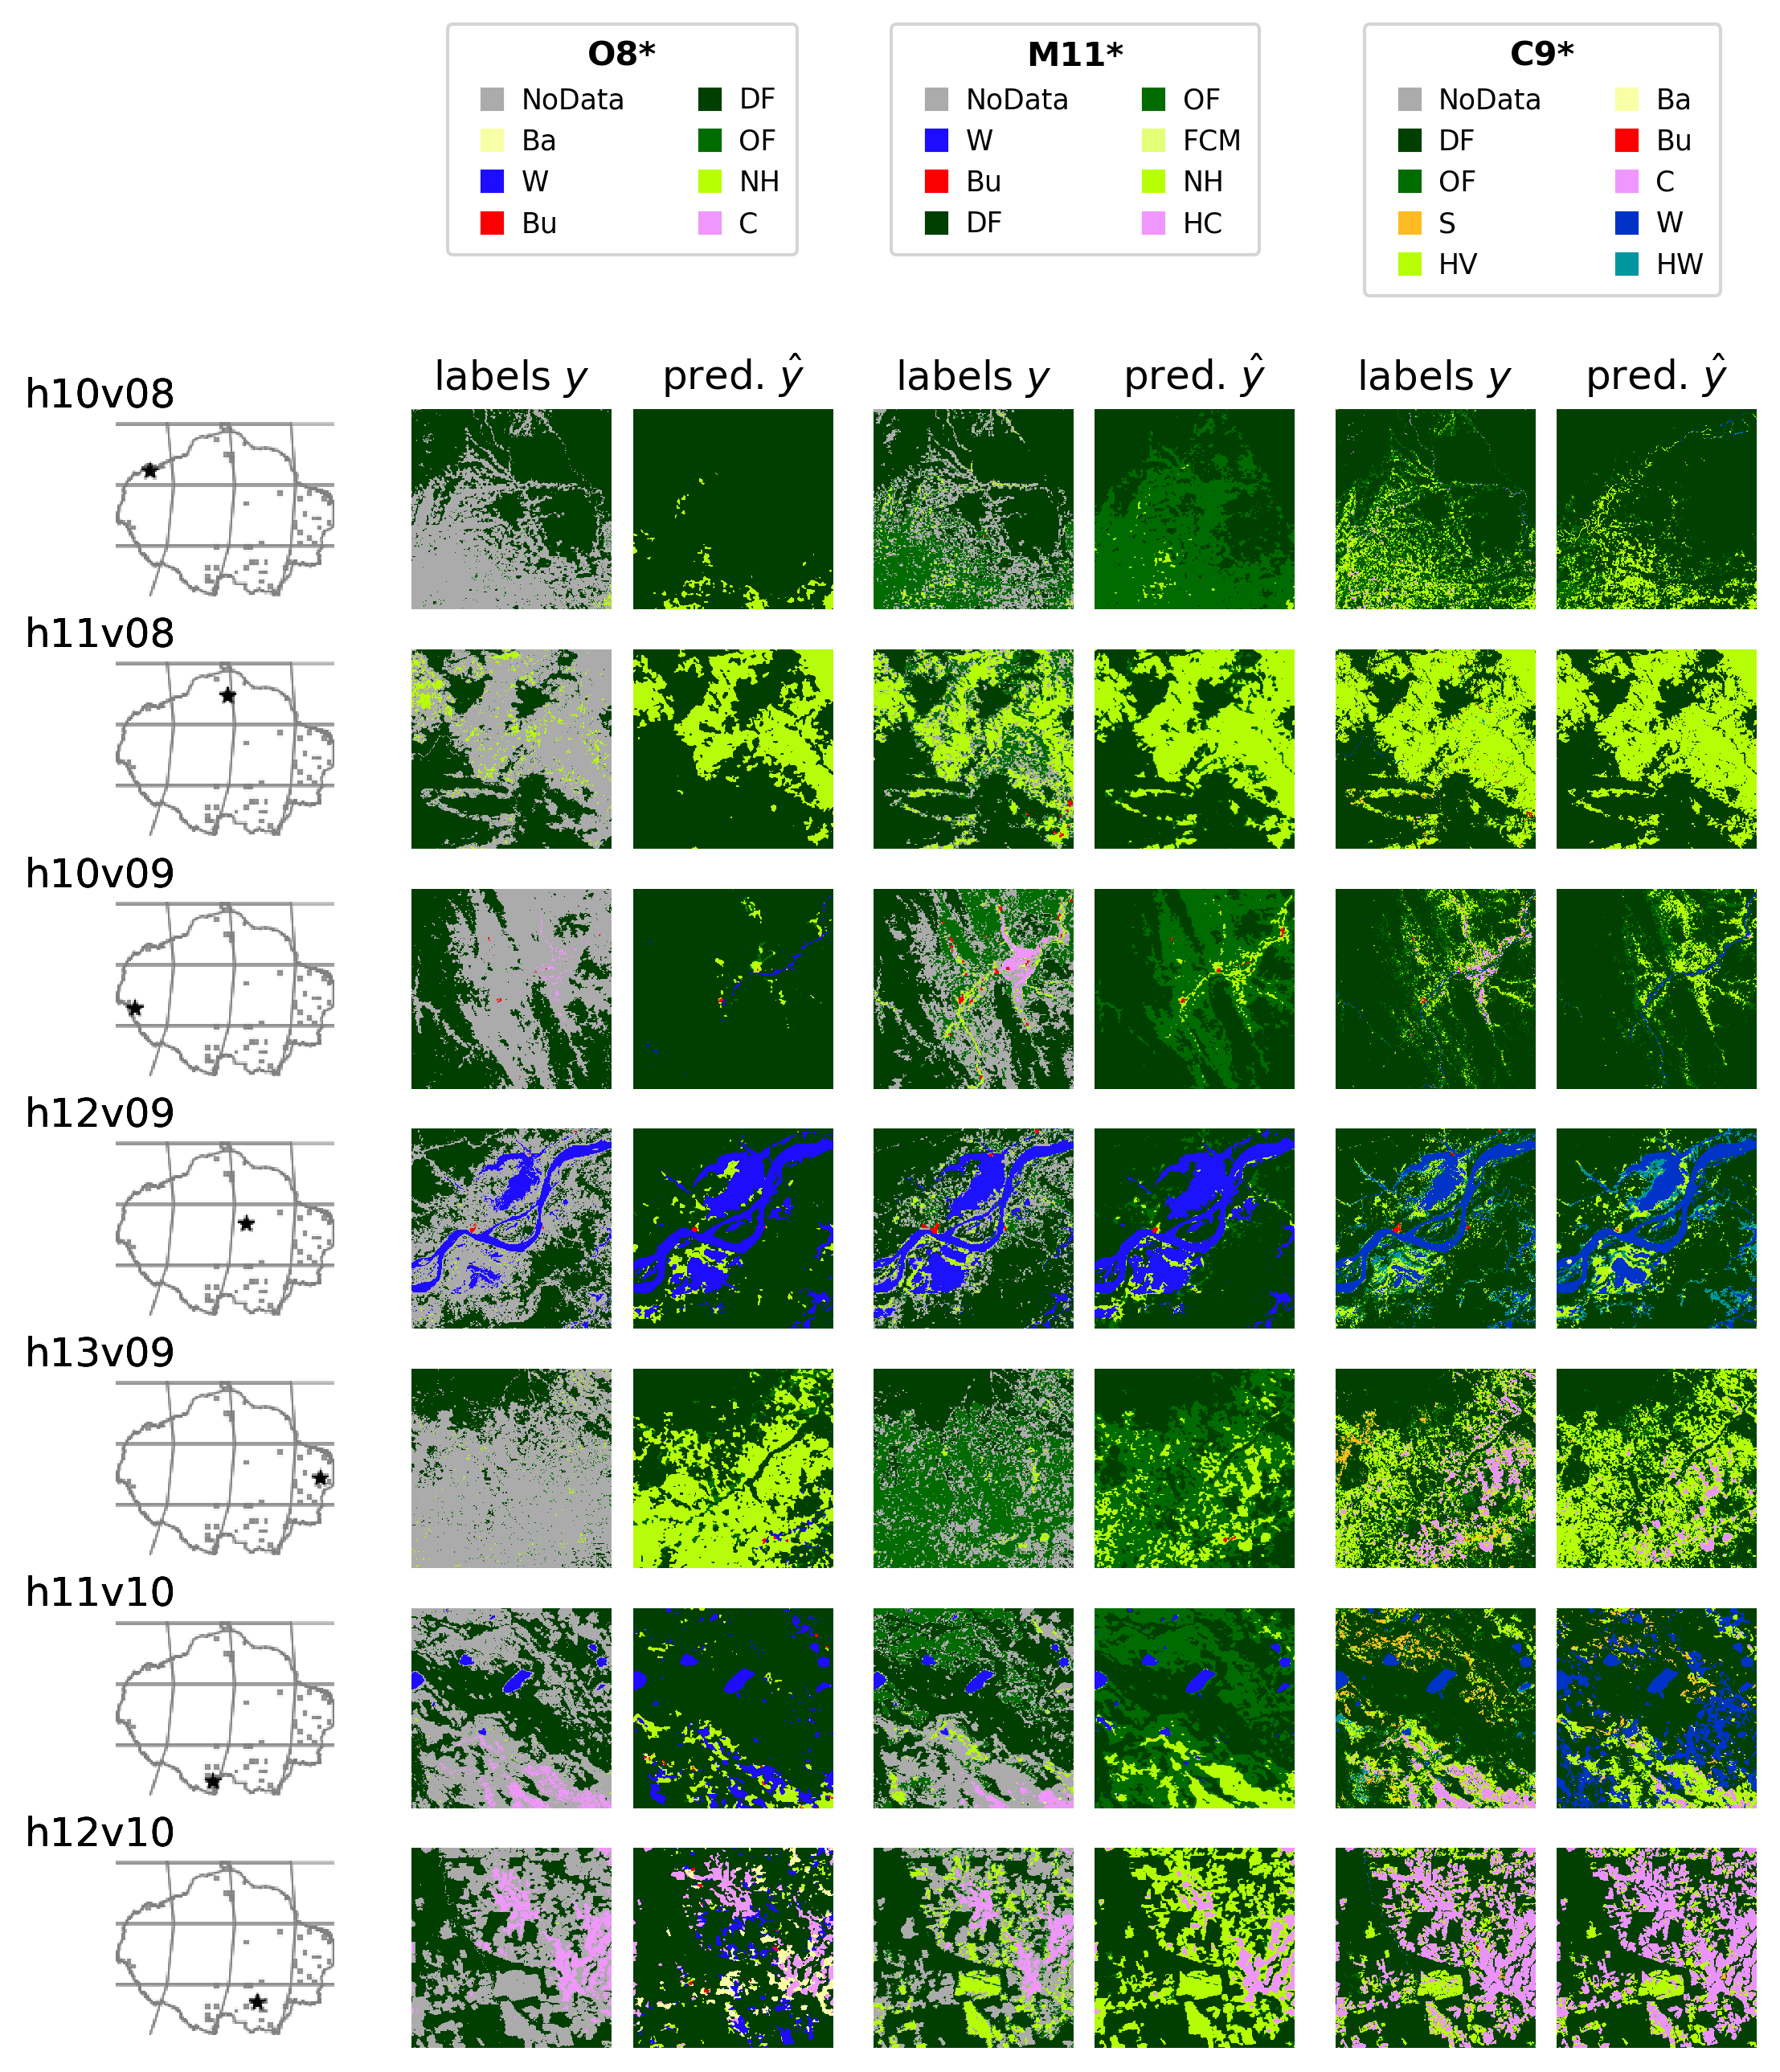

In [8]:
tiles_ids = [i[5:] for i in tiles]

gs0 = gridspec.GridSpec(1, 4,  wspace=0.1, width_ratios = [0.7, 1, 1, 1])
fig = plt.figure(figsize=(9, 9), constrained_layout=False, dpi=300)

for x, d in enumerate(datasets):
#     gs0 = gridspec.GridSpec(7, 2,  hspace=0.1, wspace=0, subplot_spec=gs0[x])
    gs00 = gridspec.GridSpecFromSubplotSpec(7, 1, wspace=0.1, subplot_spec=gs0[0])
    gs01 = gridspec.GridSpecFromSubplotSpec(7, 2, wspace=0.1, subplot_spec=gs0[x+1])

    indir_pred = os.path.join(r'E:\acocac\research\AMZ\eval\pred\1_dataset','ep' + str(epoch),'convgru\convgru64_15_fold0_' + d + '_' + ckp, str(tyear), 'prediction')
    indir_gt = os.path.join(r'E:\acocac\research\AMZ\eval\pred\1_dataset','ep' + str(epoch),'convgru\convgru64_15_fold0_' + d + '_' + ckp, str(tyear), 'ground_truth')

    colors = dataset_config[d]['colors']
    labels = dataset_config[d]['classes']
    shorts = dataset_config[d]['shortname']
    name_dataset = dataset_config[d]['name']

    n_labels = len(colors)-1
    colormap = matplotlib.colors.LinearSegmentedColormap.from_list(range(n_labels),colors)
    #load files
    array_pred = [read_file(os.path.join(indir_pred,'0_' + x + '.tif')) for x in tiles_ids]
    array_gt = [read_file(os.path.join(indir_gt,'0_' + x + '.tif')) for x in tiles_ids]

    array_pred_stack = np.stack(array_pred) #stack
    array_gt_stack = np.stack(array_gt) #stack

    array_pred_stack = array_pred_stack[newaxis, :, :, :]
    array_gt_stack = array_gt_stack[newaxis, :, :, :]
    
    array_merge = np.vstack([array_gt_stack, array_pred_stack])
    
    array_concat = np.concatenate((array_pred_stack,array_gt_stack),axis=0)
    uniqueValues = uniqueValues = np.unique(array_concat)
    uniqueValues = uniqueValues.astype(int).tolist()
    uniqueValues = uniqueValues

    # Extracting handles and labels
    newcolors = [colors[i] for i in uniqueValues]
    newlabels = [shorts[i] for i in uniqueValues]
        
    # legend = plt.legend(handles, labels, loc=5, framealpha=1, frameon=False)
#     legend = plt.legend(bbox_to_anchor=(0.5, -1.5), handletextpad=0.001, frameon=False, loc='lower center',
#                         borderaxespad=0., labels=newlabels, ncol=3, fontsize='xx-large', markerscale=2)

#     os.path.join(outdir, 'pngs', 'map_postHMM_' + suffix + '.png')

    list_aoi = [mpimg.imread(os.path.join(r'E:\acocac\research\c4',x,'post\pngs','map_aoi_' + x + '.png')) for x in tiles]
#     aoi = mpimg.imread(os.path.join(indir_aoi,'map_aoi_' + tiles[0] + '.png')) 
    
    for j in range(array_merge.shape[0]):
        for y, data in enumerate(array_merge[j,:,:,:]):
            if j == 0:
                ax00 = fig.add_subplot(gs00[y, j])
                ax00.text(-2,-2, tiles_modis[y], size='large', ha="center")
#                     ax00.set_title('Tiles', size='large', ha="center")
#                 ax01.set_title('Gtruth', size='large',ha="center")
                ax00.imshow(list_aoi[y])
                ax00.axis('off')
            
            ax01 = fig.add_subplot(gs01[y, j])
            if j == 0 and y ==0:
                ax01.set_title('labels ' + r'$y$', size='large',ha="center")
            if j == 1 and y ==0:
                ax01.set_title('pred. ' +  r'$\^y$', size='large', ha="center")
            ax01.imshow(data, cmap=colormap, interpolation='none', vmin=0, vmax=len(colors)-1) 
            if y == 0 and j ==0:
                f = lambda m, c: plt.plot([], [], marker=m, color=c, ls="none")[0]
                handles = [f("s", newcolors[i]) for i in range(len(newcolors))]
                leg = ax01.legend(handles, newlabels, fontsize = 'small', bbox_to_anchor=(2, 3), ncol=2, markerscale=1, borderpad=0.6, handletextpad=0.05, frameon=True)
                leg.set_title(name_dataset, prop={'size': 'medium', 'weight': 'heavy'})

            ax01.axis('off')
# fig.axis('off')         
plt.show()

In [ ]:
tiles_ids = [i[5:] for i in tiles]

gs0 = gridspec.GridSpec(1, 4,  wspace=0.1, width_ratios = [0.7, 1, 1, 1])
fig = plt.figure(figsize=(9, 7), constrained_layout=False)

for x, d in enumerate(datasets):
#     gs0 = gridspec.GridSpec(7, 2,  hspace=0.1, wspace=0, subplot_spec=gs0[x])
    gs00 = gridspec.GridSpecFromSubplotSpec(7, 1, wspace=0.1, subplot_spec=gs0[0])
    gs01 = gridspec.GridSpecFromSubplotSpec(7, 3, wspace=0.1, subplot_spec=gs0[x+1])

    indir_pred = os.path.join(r'E:\acocac\research\AMZ\eval\pred\1_dataset','ep' + str(epoch),'convgru\convgru64_15_fold0_' + d + '_' + ckp, str(tyear), 'prediction')
    indir_gt = os.path.join(r'E:\acocac\research\AMZ\eval\pred\1_dataset','ep' + str(epoch),'convgru\convgru64_15_fold0_' + d + '_' + ckp, str(tyear), 'ground_truth')
    indir_loss = os.path.join(r'E:\acocac\research\AMZ\eval\pred\1_dataset','ep' + str(epoch),'convgru\convgru64_15_fold0_' + d + '_' + ckp, str(tyear), 'loss')

    colors = dataset_config[d]['colors']
    labels = dataset_config[d]['classes']
    shorts = dataset_config[d]['shortname']
    name_dataset = dataset_config[d]['name']

    n_labels = len(colors)-1
    colormap = matplotlib.colors.LinearSegmentedColormap.from_list(range(n_labels),colors)
    #load files
    array_pred = [read_file(os.path.join(indir_pred,'0_' + x + '.tif')) for x in tiles_ids]
    array_gt = [read_file(os.path.join(indir_gt,'0_' + x + '.tif')) for x in tiles_ids]
    array_loss = [read_file(os.path.join(indir_loss,'0_' + x + '.tif')) for x in tiles_ids]

    array_pred_stack = np.stack(array_pred) #stack
    array_gt_stack = np.stack(array_gt) #stack
    array_loss_stack = np.stack(array_loss) #stack

    array_pred_stack = array_pred_stack[newaxis, :, :, :]
    array_gt_stack = array_gt_stack[newaxis, :, :, :]
    array_loss_stack = array_loss_stack[newaxis, :, :, :]

    array_merge = np.vstack([array_gt_stack, array_pred_stack, array_loss_stack])
    array_concat = np.concatenate((array_pred_stack,array_gt_stack),axis=0)
    uniqueValues = uniqueValues = np.unique(array_concat)
    uniqueValues = uniqueValues.astype(int).tolist()
    uniqueValues = uniqueValues

    # Extracting handles and labels
    newcolors = [colors[i] for i in uniqueValues]
    newlabels = [shorts[i] for i in uniqueValues]
        
    # legend = plt.legend(handles, labels, loc=5, framealpha=1, frameon=False)
#     legend = plt.legend(bbox_to_anchor=(0.5, -1.5), handletextpad=0.001, frameon=False, loc='lower center',
#                         borderaxespad=0., labels=newlabels, ncol=3, fontsize='xx-large', markerscale=2)

#     os.path.join(outdir, 'pngs', 'map_postHMM_' + suffix + '.png')

    list_aoi = [mpimg.imread(os.path.join(r'E:\acocac\research\c4',x,'post\pngs','map_aoi_' + x + '.png')) for x in tiles]
#     aoi = mpimg.imread(os.path.join(indir_aoi,'map_aoi_' + tiles[0] + '.png')) 
    
    for j in range(array_merge.shape[0]):
        for y, data in enumerate(array_merge[j,:,:,:]):
            if j == 0:
                ax00 = fig.add_subplot(gs00[y, j])
                ax00.text(-2,-2, tiles_modis[y], size='large', ha="center")
#                     ax00.set_title('Tiles', size='large', ha="center")
#                 ax01.set_title('Gtruth', size='large',ha="center")
                ax00.imshow(list_aoi[y])
                ax00.axis('off')
        
            ax01 = fig.add_subplot(gs01[y, j])
            if j == 0 and y ==0:
                ax01.set_title('labels ' + r'$y$', size='large',ha="center")
            if j == 1 and y ==0:
                ax01.set_title('pred. ' +  r'$\^y$', size='large', ha="center")
            if j == 2 and y ==0:
                ax01.set_title('loss\n' +  r'$H (y-\^y)$', size='large', ha="center")
            if j != 2:
                ax01.imshow(data, cmap=colormap, interpolation='none', vmin=0, vmax=len(colors)-1) 
            elif j == 2:
                ax01.imshow(data,  cmap=matplotlib.pyplot.inferno(), interpolation='none', vmin=0, vmax=11) 
            if y == 0 and j ==0:
                handles = [f("s", newcolors[i]) for i in range(len(newcolors))]
                leg = ax01.legend(handles, newlabels, fontsize = 'small', bbox_to_anchor=(2, 3), ncol=2, markerscale=1, borderpad=0.6, handletextpad=0.05, frameon=True)
                leg.set_title(name_dataset, prop={'size': 'medium', 'weight': 'heavy'})

            ax01.axis('off')
# fig.axis('off')         
# plt.show()